In [3]:
## import keras
from tensorflow import keras  # Correct way
import tensorflow as tf

# from tensorflow.keras.layers import Dropout
# from tensorflow import keras


In [4]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# from keras.layers import Dropout
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from keras.utils.np_utils import to_categorical
# from sklearn.utils import class_weight
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# --- SKLEARN IMPORTS (These were fine, keep them) ---
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# --- THE FIX: Import Keras through TensorFlow ---
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical  # 'np_utils' is deprecated, use 'utils' directly

warnings.filterwarnings('ignore')

In [5]:
#dataset
train_df=pd.read_csv('../MIT_Dataset/archive/mitbih_train.csv',header=None)
test_df=pd.read_csv('../MIT_Dataset/archive/mitbih_test.csv',header=None)

In [6]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)
train_df.shape

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


(87554, 188)

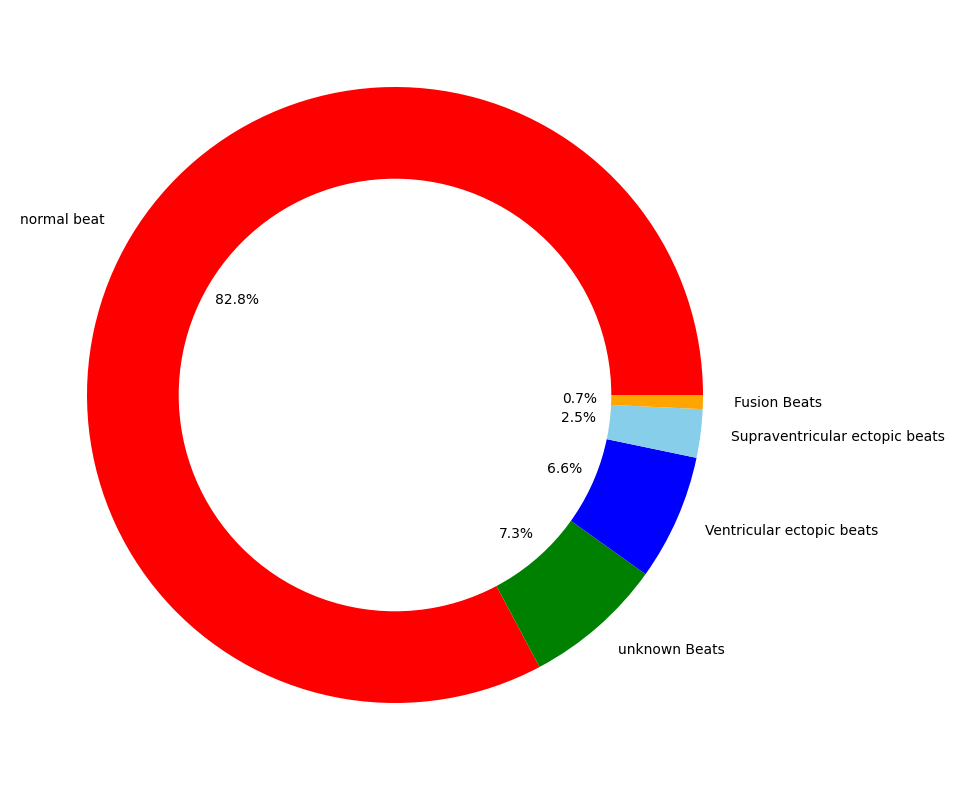

In [7]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
#resample
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


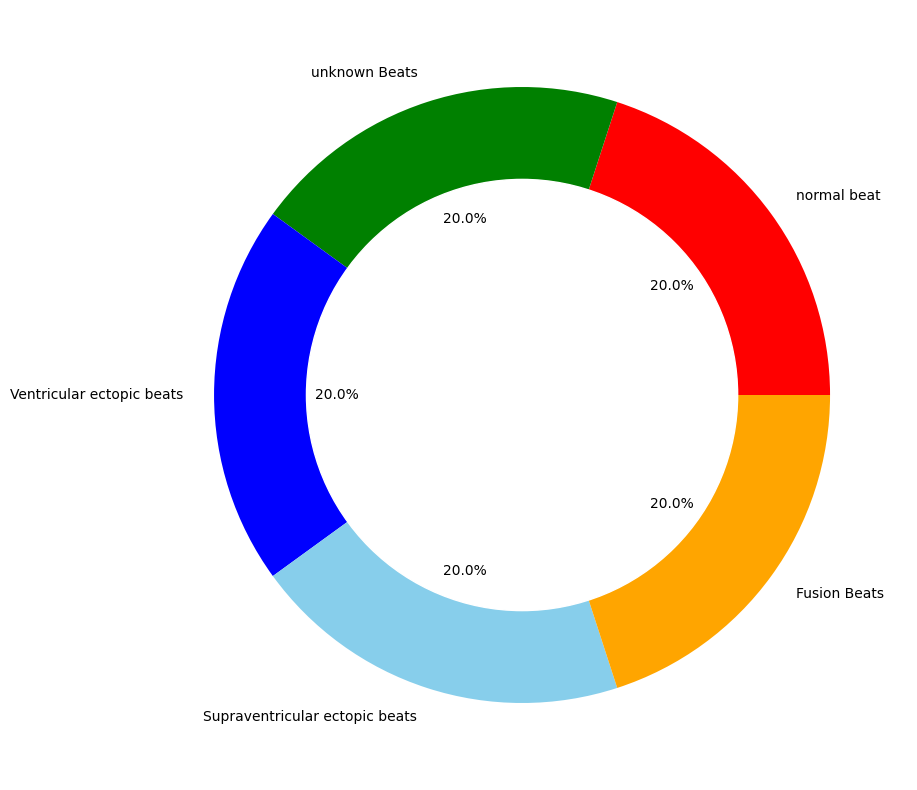

In [10]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

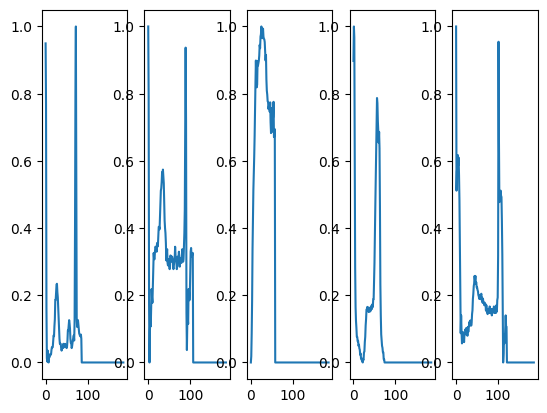

In [12]:
plt.subplot(1, 5, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.plot(c.iloc[0,:186])
plt.subplot(1, 5, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[1,:186])
plt.subplot(1, 5, 3)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[2,:186])
plt.subplot(1, 5, 4)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[3,:186])
plt.subplot(1, 5, 5)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.plot(c.iloc[4,:186])

plt.show()

In [13]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


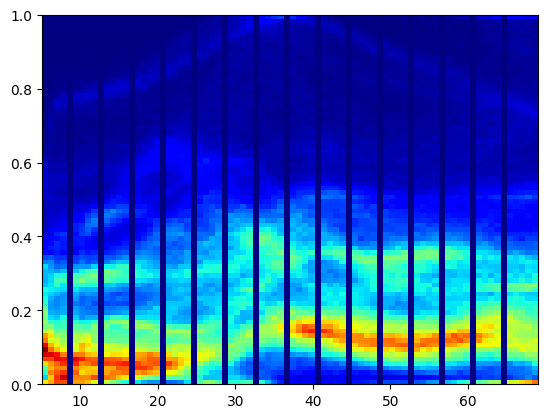

In [14]:
plot_hist(0,70,5)

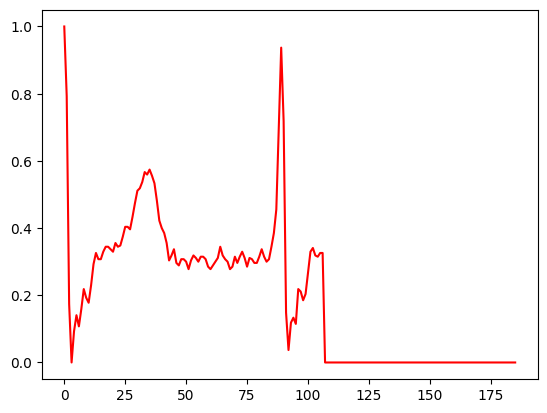

In [15]:
 plt.plot(c.iloc[1,:186],color='red')

900000
900000


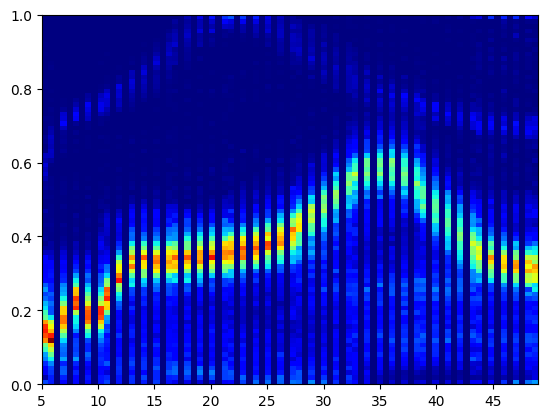

In [16]:
plot_hist(1,50,5)

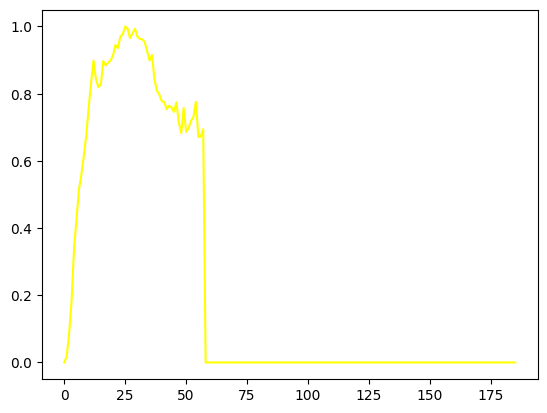

In [17]:
plt.plot(c.iloc[2,:186],color='yellow')

600000
600000


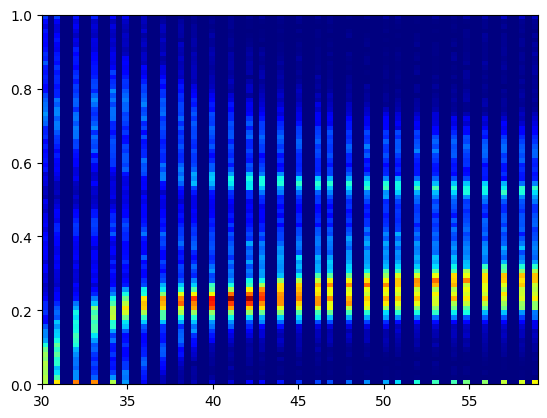

In [18]:
plot_hist(2,60,30)

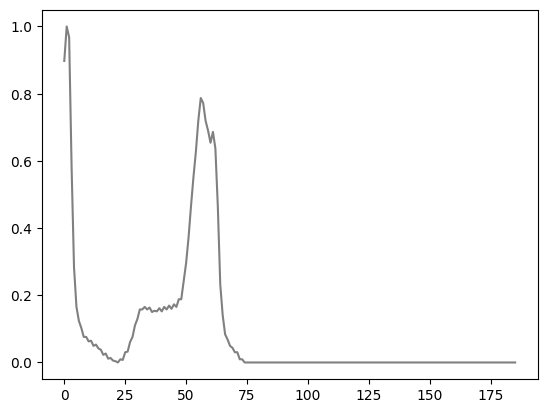

In [19]:
plt.plot(c.iloc[3,:186],color='grey')

700000
700000


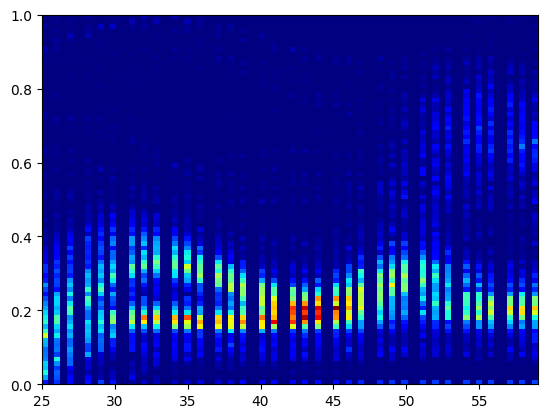

In [20]:
plot_hist(3,60,25)

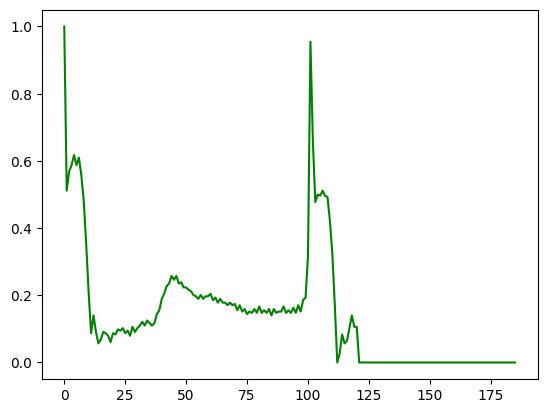

In [21]:
plt.plot(c.iloc[4,:186],color='green')

640000
640000


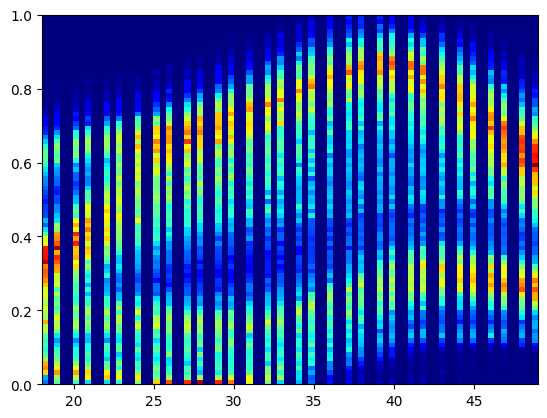

In [22]:
plot_hist(4,50,18)

In [23]:
#Gaussian Method
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

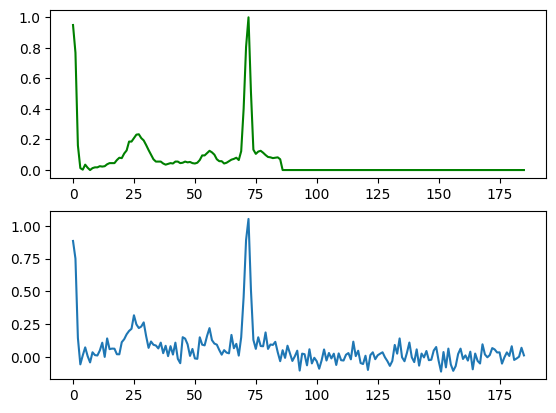

In [24]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186],color='green')

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [25]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [26]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [27]:
X_train.shape


(100000, 186, 1)

In [28]:
#train and test samples
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'testing samples')

100000 training samples
21892 testing samples


In [29]:
#model
def network(X_train,y_train,X_test,y_test):
    
   
    #Model 01
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    drop = Dropout(0.2)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    #drop = Dropout(0.2)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=200,batch_size=16,validation_data=(X_test,y_test))
    return(model,history)
   
"""
   #model 02
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    drop = Dropout(0.2)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    drop = Dropout(0.2)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    drop = Dropout(0.2)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=150,batch_size=16,validation_data=(X_test,y_test))
    return(model,history)
   """
"""
   #model 03
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    #drop = Dropout(0.2)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    drop = Dropout(0.2)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    drop = Dropout(0.2)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    drop = Dropout(0.2)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=150,batch_size=16,validation_data=(X_test,y_test))
    return(model,history)
   """
"""
   #Model 04
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    drop = Dropout(0.2)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    drop = Dropout(0.2)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    drop = Dropout(0.2)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=150,batch_size=16,validation_data=(X_test,y_test))
    return(model,history)
   """

'\n   #Model 04\n    im_shape=(X_train.shape[1],1)\n    inputs_cnn=Input(shape=(im_shape), name=\'inputs_cnn\')\n    conv1_1=Convolution1D(64, (6), activation=\'relu\', input_shape=im_shape)(inputs_cnn)\n    conv1_1=BatchNormalization()(conv1_1)\n    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)\n    drop = Dropout(0.2)\n    conv2_1=Convolution1D(64, (3), activation=\'relu\', input_shape=im_shape)(pool1)\n    conv2_1=BatchNormalization()(conv2_1)\n    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)\n    drop = Dropout(0.2)\n    conv3_1=Convolution1D(64, (3), activation=\'relu\', input_shape=im_shape)(pool2)\n    conv3_1=BatchNormalization()(conv3_1)\n    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)\n    drop = Dropout(0.2)\n    flatten=Flatten()(pool3)\n    dense_end1 = Dense(64, activation=\'relu\')(flatten)\n    dense_end2 = Dense(32, activation=\'relu\')(dense_end1)\n    main_output = Dense(5, activation=\'softmax\'

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    print('Test Loss:', scores[0])
    print('Test Accuracy:', scores[1])
    #precision_score = precision_score((X_test),y_test)
    #print('Precision score: %f' % precison_score)
    #recall_score = recall_score((X_test),y_test)
    #print('Recall Score: %f' % recall_score)
    #f1_score = f1_score((X_test),y_test)
    #print('f1 score: %f' % f1_score)
  
    
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [31]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
#from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - accuracy: 0.9298 - loss: 0.1972 - val_accuracy: 0.9302 - val_loss: 0.2059
Epoch 2/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9723 - loss: 0.0808 - val_accuracy: 0.9405 - val_loss: 0.1717
Epoch 3/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9826 - loss: 0.0535 - val_accuracy: 0.9396 - val_loss: 0.1817
Epoch 4/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9863 - loss: 0.0415 - val_accuracy: 0.9633 - val_loss: 0.1283
Epoch 5/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.9743 - val_loss: 0.1203
Epoch 6/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9763 - val_loss: 0.1142
Epoch 7/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9681 - val_loss: 0.1377
Epoch 8/200
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9933 -

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 181, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 181, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 89, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 89, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 43, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        90,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ main_output (Dense)             │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,257 (1.35 MB)

 Trainable params: 117,957 (460.77 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 235,916 (921.55 KB)

Accuracy: 98.24%
Test Loss: 0.5664687752723694
Test Accuracy: 0.982367992401123


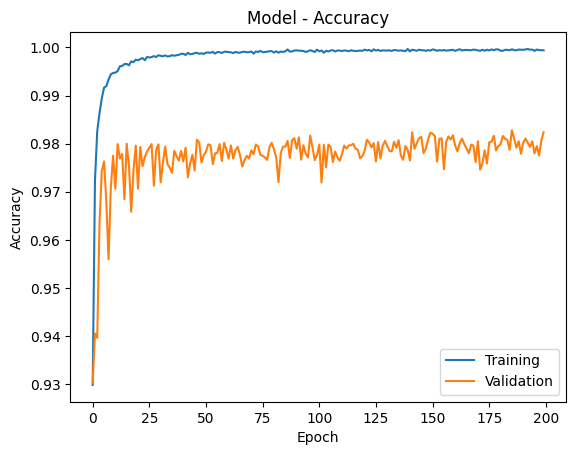

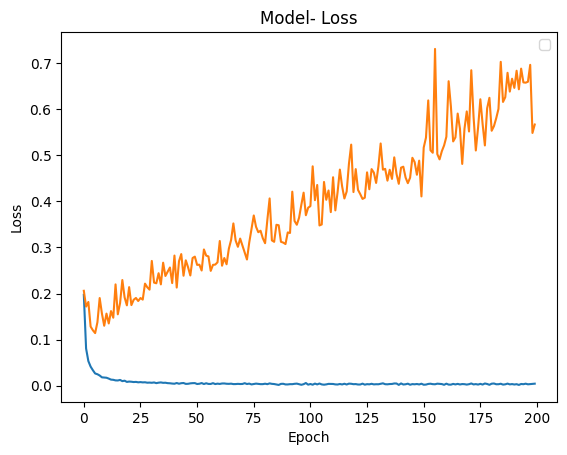

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 8.6143267e-16 1.9234340e-11 8.3284349e-21 2.0653200e-29]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
Result from real time data included in testing dataset:
0


In [33]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)


print(y_pred) 
print("Result from real time data included in testing dataset:")
Y_pred_classes = np.argmax(y_pred,axis = 1) 
print(Y_pred_classes[0])

Normalized confusion matrix


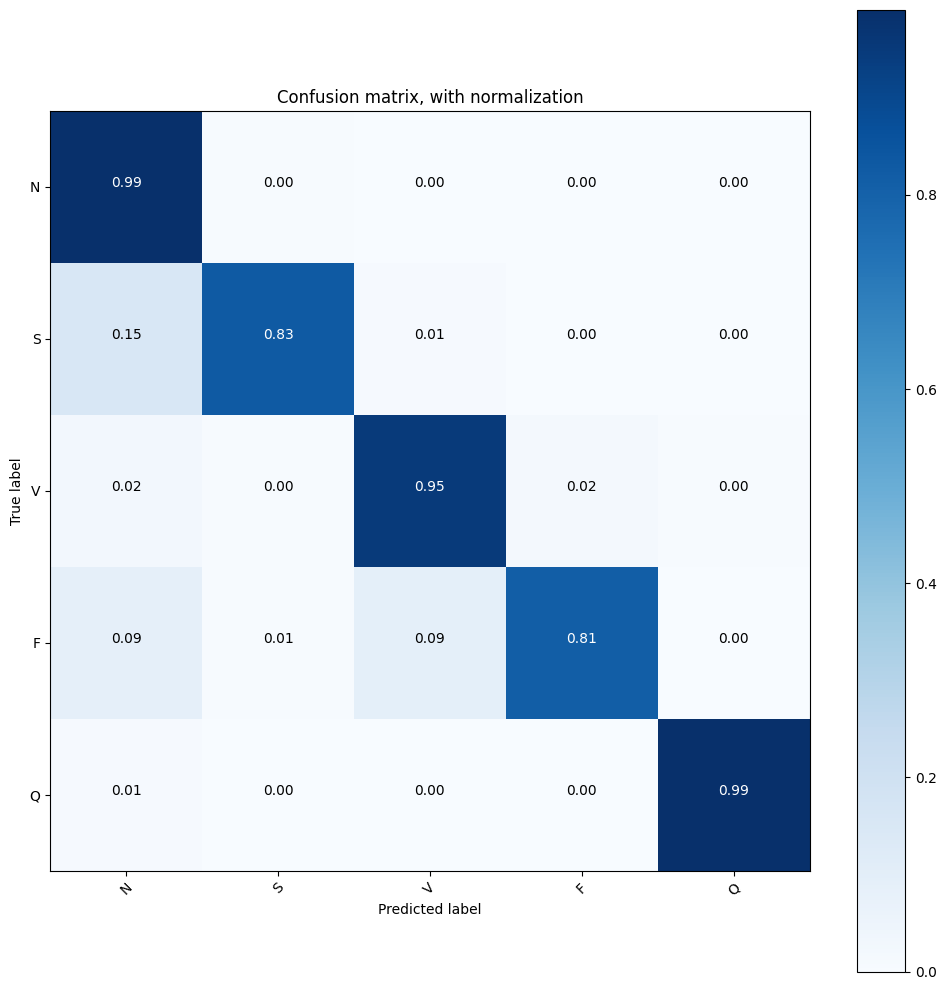

In [34]:
#confusion matrix
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

#f1_score = cnf_matrix
#print('f1 score' %f1_score)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()